# Otimização baseada no gradiente

Algoritmos de redes neurais envolvem otimização utilizando o vetor gradiente. Podemos otimizar (minimizar) uma função f(x) (denominada função de custo) utilizando sua derivada $f'(x)$ estimando $f(x+\epsilon) \approx f(x) + \epsilon*f'(x)$. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return x**2

def fl(x):
    return 2*x

In [2]:
x = np.arange(-10, 10, 0.1)
y = f(x)
lr = 0.1
point =  -10

print('f(x) =', f(point))
print('f(x + lr) =', f(point + lr))
print("f(x) + lr * f'(x) =", f(point) + lr * fl(point))

f(x) = 100
f(x + lr) = 98.01
f(x) + lr * f'(x) = 98.0


64.0 -16.0
40.96000000000001 -12.8
26.2144 -10.24
16.777216 -8.192
10.73741824 -6.5536
6.871947673600001 -5.24288
4.398046511104002 -4.194304000000001
2.8147497671065613 -3.3554432000000007
1.801439850948199 -2.6843545600000005
1.1529215046068475 -2.1474836480000006


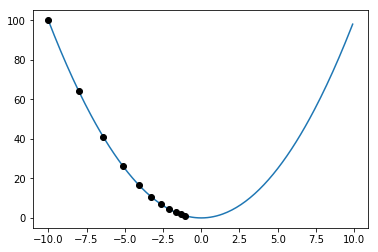

In [3]:
plt.plot(x,y)
plt.plot(point, f(point), 'o', color = 'black')
for k in range(10):
    fr = fl(point)
    new_point = point - lr * fr
    plt.plot(new_point, f(new_point), 'o', color = 'black')
    point = new_point
    print(f(point), fl(point))


Em uma rede neural artificial otimizamos uma função $f:\mathbb{R}^n \rightarrow \mathbb{R}$. Para otimizar a função atualiza-se iteratimente um ponto inicial $\vec{x}$ como $x = x - \epsilon \cdot \nabla_\vec{x}f(\vec{x})$. Por exemplo, para a função $f(x,y) = x^2 + y^2$

In [4]:
def g(x, y):
    return x**2 + y**2

def gx(x, y):
    return 2*x

def gy(x, y):
    return 2*y

In [5]:
X = np.arange(-10, 10)
Y = np.arange(-10, 10)
X, Y = np.meshgrid(X, Y)
Z = g(X,Y)

[-9, -9] 162
[-7.2, -7.2] 103.68
[-5.76, -5.76] 66.3552
[-4.608, -4.608] 42.467327999999995
[-3.6864, -3.6864] 27.17908992
[-2.9491199999999997, -2.9491199999999997] 17.394617548799996
[-2.3592959999999996, -2.3592959999999996] 11.132555231231997
[-1.8874367999999997, -1.8874367999999997] 7.124835347988478
[-1.5099494399999998, -1.5099494399999998] 4.559894622712625
[-1.2079595519999997, -1.2079595519999997] 2.91833255853608
[-0.9663676415999998, -0.9663676415999998] 1.8677328374630913
[-0.7730941132799998, -0.7730941132799998] 1.1953490159763782
[-0.6184752906239999, -0.6184752906239999] 0.7650233702248822
[-0.4947802324991999, -0.4947802324991999] 0.4896149569439246
[-0.3958241859993599, -0.3958241859993599] 0.31335357244411177
[-0.3166593487994879, -0.3166593487994879] 0.20054628636423152
[-0.25332747903959035, -0.25332747903959035] 0.12834962327310817
[-0.20266198323167228, -0.20266198323167228] 0.08214375889478924
[-0.16212958658533783, -0.16212958658533783] 0.05257200569266511
[-

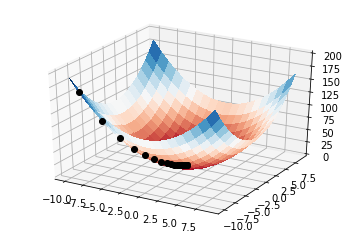

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

point = [-9, -9]
print(point, g(point[0], point[1]))
plt.plot([point[0]],[point[1]],[g(point[0], point[1])], 'o', color = 'black')

for k in range(10):
    grad = [gx(point[0], point[1]), gy(point[0], point[1])] # vetor gradiente
    point = [point[0] - lr * grad[0] , point[0] - lr * grad[1]] # x - lr * gradiente
    plt.plot([point[0]],[point[1]],[g(point[0], point[1])], 'o', color = 'black')
    print(point, g(point[0], point[1]))

plt.show()

## Exercício

1. O que ocorre durante a otimização com gradiente ao encontrar um ponto de cela? E um mínimo local?
2. Altere a função f para que possua mínimos locais. Inicialize o algoritmo de otimização em um ponto para demonstrar o que ocorre neste caso.
3. Altere a função g para que possua pontos de cela. Inicialize o algoritmo de otimização em um ponto para demonstrar o que ocorre neste caso.
4. Como podemos determinar a convergência do gradiente descendente?

## Leitura recomendada

[Seção 4.3.](http://www.deeplearningbook.org/contents/numerical.html) Goodfellow, Ian, Yoshua Bengio, and Aaron Courville. Deep learning. MIT press, 2016.